#### 参考URL
https://github.com/ipython-books/cookbook-code
https://github.com/ipython-books/cookbook-data

#### レシピ1.2(エラーがでて実行できなかったのでPASS)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = 'D:\IPythonnotebook\cookbook\2013.csv'
df = pd.read_csv(url, index_col='Date', parse_dates=True, dayfirst=True)


UnicodeEncodeError: 'mbcs' codec can't encode characters in position 0--1: invalid character

#### レシピ1.3

In [2]:
import random
import numpy as np

%precision 3

n = 1000000
x = [random.random() for _ in range(n)]
y = [random.random() for _ in range(n)]
x[:3],y[:3]
%timeit [x[i]+y[i] for i in range(n)]
z[:3]
xa = np.array(x)
ya = np.array(y)
xa[:3]
%timeit xa + ya

%timeit sum(x)
%timeit np.sum(xa)


10 loops, best of 3: 124 ms per loop
100 loops, best of 3: 3.11 ms per loop
100 loops, best of 3: 3.53 ms per loop
1000 loops, best of 3: 559 µs per loop


#### レシピ2.7

In [3]:
%%writefile datautils.py
# Version 1.
import os
from urllib.request import urlopen  # Python 2: use urllib2

def download(url):
    """Download a file and save it in the current folder.
    Return the name of the downloaded file."""
    # Get the filename.
    file = os.path.basename(url)
    # Download the file unless it already exists.
    if not os.path.exists(file):
        with open(file, 'w') as f:
            f.write(urlopen(url).read())
    return file

Writing datautils.py


In [4]:
%%writefile test_datautils.py
from urllib.request import (HTTPHandler, install_opener, 
                            build_opener, addinfourl)
import os
import shutil
import tempfile
from io import StringIO  # Python 2: use StringIO
from datautils import download

TEST_FOLDER = tempfile.mkdtemp()
ORIGINAL_FOLDER = os.getcwd()

class TestHTTPHandler(HTTPHandler):
    """Mock HTTP handler."""
    def http_open(self, req):
        resp = addinfourl(StringIO('test'), '', req.get_full_url(), 200)
        resp.msg = 'OK'
        return resp
    
def setup():
    """Install the mock HTTP handler for unit tests."""
    install_opener(build_opener(TestHTTPHandler))
    os.chdir(TEST_FOLDER)
    
def teardown():
    """Restore the normal HTTP handler."""
    install_opener(build_opener(HTTPHandler))
    # Go back to the original folder.
    os.chdir(ORIGINAL_FOLDER)
    # Delete the test folder.
    shutil.rmtree(TEST_FOLDER)

def test_download1():
    file = download("http://example.com/file.txt")
    # Check that the file has been downloaded.
    assert os.path.exists(file)
    # Check that the file contains the contents of the remote file.
    with open(file, 'r') as f:
        contents = f.read()
    print(contents)
    assert contents == 'test'

Writing test_datautils.py


#### システムシェルのコマンドを使うのは簡単で、頭に!をつけて実行するだけです。
参考URL： http://qiita.com/5t111111/items/7852e13ace6de288042f

In [5]:
!nosetests


.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


#### レシピ3.1

In [6]:
!pip install ipythonblocks


In [7]:
import time
from IPython.display import clear_output
from ipythonblocks import BlockGrid,colors

grid = BlockGrid(width=5,height=5,fill=colors['Purple'])
grid[0,0]=colors['Lime']
grid[-1,0]=colors['Lime']
grid[:,-1]=colors['Lime']
grid.show()


,,,,
,,,,
,,,,
,,,,
,,,,


In [8]:
import time
from IPython.display import clear_output


n=5
grid = BlockGrid(width=2*n+1,height=2*n+1,fill=colors['White'])
A = grid[n+1:,:n]
B = grid[:n,n+1:]
C = grid[n+1:,n+1:]
A[:,:] = colors['Cyan']
B[:,:] = colors['Lime']
C[:,:] = colors['Yellow']
grid.show()
for i in range(n):
    for j in range(n):
        # We reset the matrix colors.
        A[:,:] = colors['Cyan']
        B[:,:] = colors['Lime']
        C[:,:] = colors['Yellow']
        # We highlight the adequate rows
        # and columns in red.
        A[i,:] = colors['Red']
        B[:,j] = colors['Red']
        C[i,j] = colors['Red']
        # We animate the grid in the loop.
        clear_output()
        grid.show()
        time.sleep(.25)

,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,
,,,,,,,,,,


#### 画像の表示
"https://github.com/ipython-books/cookbook-data" からportrait.zipをDLしてカレントフォルダー内に展開しておく必要がある
imdataは80×80画素ありそれをGridのblockにひとつひとつコピーしている。
for block,rgb in zip(grid,imdata):
    block.rgb=rgb
上のコードがそれを行っている

grid =BlockGrid(width=rows,height=cols,block_size=4,lines_on=False)
でlines_onをTrueにするとメッシュが現れる

In [9]:
from ipythonblocks import BlockGrid
from PIL import Image
imdata = Image.open('data/photo.jpg').getdata()
rows,cols=imdata.size
print(rows,cols)
grid =BlockGrid(width=rows,height=cols,block_size=4,lines_on=False)
for block,rgb in zip(grid,imdata):
    block.rgb=rgb
grid.show()

80 80


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


#### レシピ3.2
dataフォルダーにtest.ipynbを入れておく
cmdでconda install pywin32をインストールした。
"http://ichitcltk.hustle.ne.jp/gudon2/index.php?pageType=file&id=python_win32com.md"に解説があった

In [10]:
with open('data/test.ipynb','r') as f:
    contents = f.read()
print (len(contents))
import json
nb = json.loads(contents)
print(nb.keys())
print('nbformat ' + str(nb['nbformat']) + 
     '.' + str(nb['nbformat_minor']))
nb['worksheets'][0].keys()


3787
dict_keys(['worksheets', 'nbformat', 'metadata', 'nbformat_minor'])
nbformat 3.0


dict_keys(['metadata', 'cells'])

In [11]:
%%javascript
// This function allows us to add buttons 
// to the notebook toolbar.
IPython.toolbar.add_buttons_group([
{
    // The button's label.
    'label': 'renumber all code----- cells',
    
    // The button's icon.
    // See a list of Font-Awesome icons here:
    // http://fortawesome.github.io/Font-Awesome/icons/
    'icon': 'icon-list-ol',
    
    // The callback function.
    'callback': function () {
        
        // We retrieve the lists of all cells.
        var cells = IPython.notebook.get_cells();
        
        // We only keep the code cells.
        cells = cells.filter(function(c)
            {
                return c instanceof IPython.CodeCell; 
            })
        
        // We set the input prompt of all code cells.
        for (var i = 0; i < cells.length; i++) {
            cells[i].set_input_prompt(i + 1);
        }
    }
}]);

<IPython.core.display.Javascript object>

In [7]:
%%timeit s= 0;n=100000
s = sum([1/i**2 for i in range(1,n)])
print(s) 

1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
1.6449240667982423
10 loops, best of 3: 30.2 ms per loop


In [20]:

import numpy as np
s = 0
n=100000
s = np.sum(1/(np.arange(1.0,n)**2))
print(s)

1.6449240668


In [17]:
n=100000
x = np.arange(1,n)
print(x)

[    1     2     3 ..., 99997 99998 99999]


#### レシピ4.2

In [23]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def step(*shape):
    return 2*(np.random.random_sample(shape) < 0.5) - 1

In [28]:
%%prun -s cumulative -q -l 10 -T prun0
n = 100000
iterations = 50
x = np.cumsum(step(iterations,n),axis=0)
bins = np.arange(-30,30,1)
y = np.vstack([np.histogram(x[i,:],bins)[0] for i in range(iterations)])
    

 
*** Profile printout saved to text file 'prun0'. 


In [29]:
print(open('prun0','r').read())

         4962 function calls in 0.195 seconds

   Ordered by: cumulative time
   List reduced from 40 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.195    0.195 {built-in method builtins.exec}
        1    0.001    0.001    0.194    0.194 <string>:2(<module>)
        1    0.022    0.022    0.089    0.089 <ipython-input-23-8cab12e2f998>:6(step)
        1    0.000    0.000    0.088    0.088 <string>:6(<listcomp>)
       50    0.001    0.000    0.088    0.002 function_base.py:78(histogram)
      100    0.000    0.000    0.083    0.001 fromnumeric.py:712(sort)
      100    0.081    0.001    0.081    0.001 {method 'sort' of 'numpy.ndarray' objects}
        1    0.067    0.067    0.067    0.067 {method 'random_sample' of 'mtrand.RandomState' objects}
        1    0.000    0.000    0.016    0.016 fromnumeric.py:2038(cumsum)
        1    0.016    0.016    0.016    0.016 {method 'cumsum' of 'numpy.ndarray'

In [30]:
import numpy as np

np.zeros(500000000)


array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [31]:
!pip install psutil

In [32]:
%%writefile simulation.py
import numpy as np

def step(*shape):
    # Create a random n-vector with +1 or -1 values.
    return 2 * (np.random.random_sample(shape) < .5) - 1

def simulate(iterations, n=10000):
    s = step(iterations, n)
    x = np.cumsum(s, axis=0)
    bins = np.arange(-30, 30, 1)
    y = np.vstack([np.histogram(x[i,:], bins)[0] for i in range(iterations)])
    return y

Writing simulation.py


In [33]:
%load_ext memory_profiler

%mprun -T mprofo -f simulation.simulation simulation(50)

ImportError: No module named 'memory_profiler'

In [34]:
!pip install memory_profiler

  Running setup.py bdist_wheel for memory-profiler
  Stored in directory: C:\Users\joshua\AppData\Local\pip\Cache\wheels\28\75\32\c2cc09a38052f77c11535de0f620ea53fa4bdff67b650a90a6
Successfully built memory-profiler


In [39]:
%load_ext memory_profiler

%mprun -T mprof0 -f simulation.simulate simulation.simulate(50)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


UsageError: Could not find function 'simulation.simulate'.
NameError: name 'simulation' is not defined

In [1]:
def id(s):
    return s.__array_interface__['data'][0]


In [6]:
import numpy as np

a=np.array([1,2,3,4,5,6,7,8,9,10])
print(id(a))
print(id(a[1:]))

66570080
66570084


In [16]:
import numpy as np

def id(s):
    return s.__array_interface__['data'][0]

a = np.array([1,2,3,4,5])
print(a)
aid = a
a *= 2
print(a)
print(id(a) == aid)

[1 2 3 4 5]
[ 2  4  6  8 10]
[False False False False False]


In [18]:
import numpy as np

a = np.random.rand(5000,5000)

%timeit a[0,:] .sum()
%timeit a[:,0] .sum()


The slowest run took 13.13 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.17 µs per loop
10000 loops, best of 3: 53.8 µs per loop


In [20]:
x = np.zeros(10)

print(x.strides)

y = np.zeros((10,10))
print(y.strides)


(8,)
(80, 8)


In [11]:
import numpy as np
a=np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(a.size,a.nbytes,a.shape)

10 40 (2, 5)


In [19]:
import numpy as np
a=np.array([1,2,0,0])
b=np.array([1,2,3,0])
c=np.array([1,2,3,4])
v=np.vstack((a,b,c))
print (v)

[[1 2 0 0]
 [1 2 3 0]
 [1 2 3 4]]


In [20]:
import numpy as np
a=np.array([1,2,0,0])
b=np.array([[1,2,3,0],[5,6,7,8]])
print(a.itemsize)
print(b.itemsize)


4
4


#### レシピ４．７

In [2]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def id(s):
    return s.__array_interface__['data'][0]



In [3]:
n=5
k=2

In [4]:
a = np.linspace(1,n,n)
aid = id(a)

In [5]:
as_strided(a,(k,n),(8,8))

array([[  1.00000000e+000,   2.00000000e+000,   3.00000000e+000,
          4.00000000e+000,   5.00000000e+000],
       [  2.00000000e+000,   3.00000000e+000,   4.00000000e+000,
          5.00000000e+000,  -1.30052800e-231]])

#### レシピ4.9
tempfileはpythonのモジュール一時的なデリクトリ、ファイルを作ってくれる
mkdtempはその場所の絶対パスを返す

In [7]:
from tempfile import mkdtemp
import os.path as path
import numpy as np

print(mkdtemp())
filename = path.join(mkdtemp(),'memmapped.dat')
nrows = 1000000
ncols = 100
f = np.memmap(filename,dtype=np.float32,mode='w+',shape=(nrows,ncols))
#引数のmodeはw+以外にも'r','r+''c'がある
for i in range(ncols):
     f[:,i] = np.random.rand(nrows)

del f


C:\Users\joshua\AppData\Local\Temp\tmpaytvapla


In [1]:
import sys
print(sys.version)
print(64 if sys.maxsize > 2**32 else 32)

3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Dec  7 2015, 15:00:12) [MSC v.1900 64 bit (AMD64)]
64


In [5]:
%%writefile mandelbrot.c
// Needed when creating a DLL.
#define EXPORT __declspec(dllexport)

#include "include\stdio.h"
#include "include\stdlib.h"

// This function will be available in the DLL.
EXPORT void __stdcall mandelbrot(int size,
                                 int iterations,
                                 int *col) 
{
    // Variable declarations.
    int i, j, n, index;
    double cx, cy;
    double z0, z1, z0_tmp, z0_2, z1_2;
    
    // Loop within the grid.
    for (i = 0; i < size; i++)
    {
        cy = -1.5 + (double)i / size * 3;
        for (j = 0; j < size; j++)
        {
            // We initialize the loop of the system.
            cx = -2.0 + (double)j / size * 3;
            index = i * size + j;
            // Let's run the system.
            z0 = 0.0;
            z1 = 0.0;
            for (n = 0; n < iterations; n++)
            {
                z0_2 = z0 * z0;
                z1_2 = z1 * z1;
                if (z0_2 + z1_2 <= 100)
                {
                    // Update the system.
                    z0_tmp = z0_2 - z1_2 + cx;
                    z1 = 2 * z0 * z1 + cy;
                    z0 = z0_tmp;
                    col[index] = n;
                }
                else
                {
                    break;
                }
            }
        }
    }
}

Overwriting mandelbrot.c


In [7]:
!bin\cl /LD mandelbrot.c


mandelbrot.c
d:\ipythonnotebook\cookbook\include\stdio.h(20) : fatal error C1034: crtdefs.h: インクルード パスが設定されていません。


Microsoft(R) C/C++ Optimizing Compiler Version 18.00.40629 for x86
Copyright (C) Microsoft Corporation.  All rights reserved.



The cythonmagic extension is already loaded. To reload it, use:
  %reload_ext cythonmagic


In [10]:
%%cython -a
import numpy as np

def mandelbrot_cython(m, size, iterations):
    for i in range(size):
        for j in range(size):
            c = -2 + 3./size*j + 1j*(1.5-3./size*i)
            z = 0
            for n in range(iterations):
                if np.abs(z) <= 10:
                    z = z*z + c
                    m[i, j] = n
                else:
                    break

    

ERROR: Cell magic `%%cython` not found.


レシピ6.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline



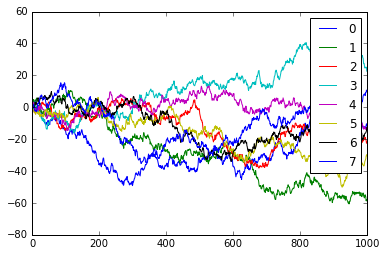

In [3]:
np.random.seed(12)
for i in range(8):
    x = np.arange(1000)
    y = np.random.randn(1000).cumsum()
    plt.plot(x,y,label=str(i))
plt.legend()

C:\Users\joshua\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


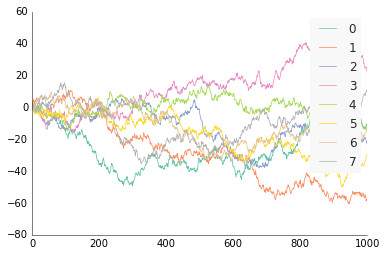

In [5]:
import prettyplotlib as ppl

np.random.seed(12)
for i in range(8):
    x = np.arange(1000)
    y = np.random.randn(1000).cumsum()
    ppl.plot(x,y,label=str(i))
ppl.legend()

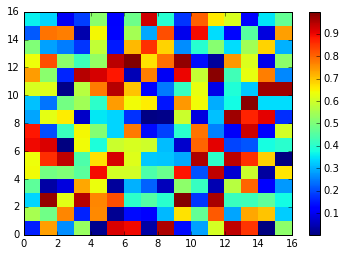

In [8]:
np.random.seed(12)
plt.pcolormesh(np.random.rand(16,16))
plt.colorbar()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


x1 = np.random.randn(80)
x2 = np.random.randn(80)
x3 = x1 * x2
y1 = .5 + 2 * x1 - x2 + 2.5 * x3 + 3 * np.random.randn(80)
y2 = .5 + 2 * x1 - x2 + 2.5 * np.random.randn(80)
y3 = y2 + np.random.randn(80)


C:\Users\joshua\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


C:\Users\joshua\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


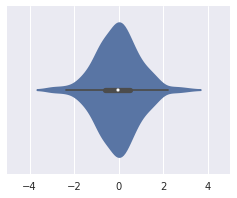

In [12]:
plt.figure(figsize=(4,3));
sns.violinplot([x1,x2, x3]);

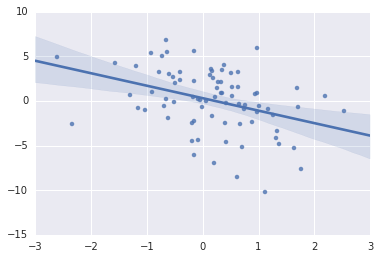

In [13]:
sns.regplot(x2,y2)

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

player = 'Roger Federer'
filename = "data1/{name}.csv".format(
              name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [4]:
df


,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 2nd serve return points total,player2 break points converted won,player2 break points converted total,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total
0,1998,"Basel, Switzerland",05.10.1998,WS,Indoor: Hard,Draw: 32,1,396,"$9,800",R32,...,22,4,8,8,36,50,26,53,62,103
1,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",R32,...,19,0,1,8,33,65,8,41,41,106
2,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",R16,...,30,0,4,10,46,75,23,73,69,148
3,1998,"Toulouse, France",28.09.1998,WS,Indoor: Hard,Draw: 32,59,878,"$10,800",Q,...,28,3,10,10,44,63,26,67,70,130
4,1998,"Geneva, Switzerland",24.08.1998,CH,Outdoor: Clay,Draw: 32,1,680,$520,R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998,"Gstaad, Switzerland",06.07.1998,WS,Outdoor: Clay,Draw: 32,1,702,"$5,250",R32,...,38,4,5,10,38,62,35,74,73,136
6,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",R32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",R16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1999,"Brest, France",25.10.1999,CH,Indoor: Hard,Draw: 32,78,66,"$14,400",S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["win"] =df["winner"] == player

In [4]:
df["win"].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

mean()はNumpyの関数かも、算術平均を計算する
df["win"]はbool値なのでtrue=1,false=0なのでvicは優勝率を表す

In [10]:
print("{player} has won {vic:.0f}% of his ATP matches.".format(
      player=player, vic=100*df['win'].mean()))

Roger Federer has won 82% of his ATP matches.


In [5]:
date = pd.to_datetime(df["start date"])

In [6]:
date.head()


0   1998-05-10
1   1998-09-28
2   1998-09-28
3   1998-09-28
4   1998-08-24
Name: start date, dtype: datetime64[ns]

In [8]:
df['dblfaults'] = (df['player1 double faults']/df['player1 total points total'])


In [12]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

groupby('surface')でグループ化している
surfaceはテニスコート表面の種類は
- Indoor:Carpet
- Indoor:Clay
- Indoor:Hard
- outdoor:Carpet
- outdoor:Clay
- outdoor:Hard
- outdoor:Grass <br>
にグループ化してその勝率の平均を出している
するとこのプレーヤーはOutDoor:Grassの勝率が高いのがわかる

In [13]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [14]:
gb = df.groupby('year')

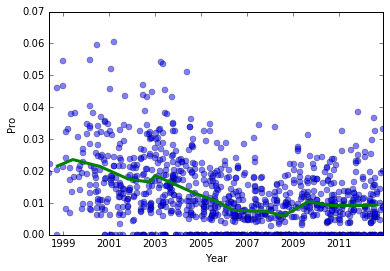

In [19]:
plt.plot_date(date,df['dblfaults'],alpha=0.5,lw=0)
plt.plot_date(gb['start date'].max(),gb['dblfaults'].mean(),'-',lw=3)
plt.xlabel('Year')
plt.ylabel('Pro')

In [2]:
import numpy as np
import scipy.stats as st
import scipy.special as sp


In [6]:
n = 100
h = 61
q = 0.5
xbar = float(h)/n
z = (xbar - q) * np.sqrt(n/(q*(1-q)))
print(z)
pval = 2*(1-st.norm.cdf(z))
print(pval)

2.2
0.027806895027


In [10]:
import numpy as np
import scipy.stats as st
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline



0.00711073226993


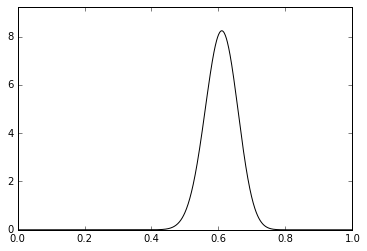

In [14]:
posterior = lambda n,h,q:((n+1)*st.binom(n,q).pmf(h))
n = 100
h = 61
q = np.linspace(0.0,1.0,1000)
d = posterior(n,h,q)
plt.plot(q,d,'-k')
plt.ylim(0,d.max()+1)
print(sci.misc.comb(n,h)*pow(0.5,h)*pow(0.5,n-h))

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy as sci
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
player = 'Roger Federer'
filename = "data2/{name}.csv".format(name=player.replace(' ','-'))
df = pd.read_csv(filename)

全てのカラム
    year
    tournament,
    start date,
    type,
    surface,
    draw,
    atp points,
    atp ranking,
    tournament prize money,
    round,
    opponent,
    ranking,
    score,
    stats link,
    tournament,
    tournament round,
    time,
    winner,
    player1 name,
    player1 nationality,
    player1 aces,
    player1 double faults,
    player1 1st serves in,
    player1 1st serves total,
    player1 1st serve points won,
    player1 1st serve points total,
    player1 2nd serve points won,
    player1 2nd serve points total,
    player1 break points won,
    player1 break points total,
    player1 service games played,
    player1 1st serve return points won,
    player1 1st serve return points total,
    player1 2nd serve return points won,
    player1 2nd serve return points total,
    player1 break points converted won,
    player1 break points converted total,
    player1 return games played,
    player1 total service points won,player1 total service points total,
    player1 total return points won,player1 total return points total,
    player1 total points won,
    player1 total points total,
    player2 name,
    player2 nationality,
    player2 aces,
    player2 double faults,
    player2 1st serves in,
    player2 1st serves total,
    player2 1st serve points won,
    player2 1st serve points total,
    player2 2nd serve points won,
    player2 2nd serve points total,
    player2 break points won,
    player2 break points total,
    player2 service games played,
    player2 1st serve return points won,
    player2 1st serve return points total,
    player2 2nd serve return points won,
    player2 2nd serve return points total,
    player2 break points converted won,
    player2 break points converted total,
    player2 return games played,
    player2 total service points won,
    player2 total service points total,
    player2 total return points won,
    player2 total return points total,
    player2 total points won,
    player2 total points total
テニス大会の情報

In [21]:
print("Number of columns: " +str(len(df.columns)))
df[df.columns[:4]].tail()

Number of columns: 70


,year,tournament,start date,type
1174,2012,"Australian Open, Australia",16.01.2012,GS
1175,2012,"Doha, Qatar",02.01.2012,250
1176,2012,"Doha, Qatar",02.01.2012,250
1177,2012,"Doha, Qatar",02.01.2012,250
1178,2012,"Doha, Qatar",02.01.2012,250


(0.0, 0.16)

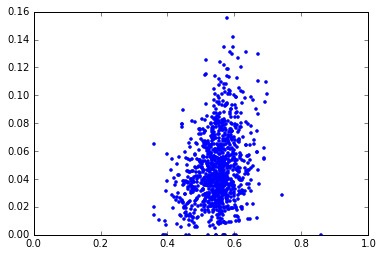

In [24]:
npoints = df['player1 total points total']
points = df['player1 total points won']/npoints
aces = df['player1 aces']/npoints
plt.plot(points,aces,'.')
plt.xlim(0.0,1.0)
plt.ylim(0.0)

In [25]:
df_bis = pd.DataFrame({'points':points,'aces':aces}).dropna()
df_bis.tail()

,aces,points
1173,0.024390,0.585366
1174,0.039855,0.471014
1175,0.046512,0.639535
1176,0.020202,0.606061
1177,0.069364,0.531792


In [26]:
df_bis.corr()

,aces,points
aces,1.000000,0.255457
points,0.255457,1.000000
